Feature engineering is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms

Feature Engineering

1.1.   Feature Transformation

1.   Missing value Imputation
2.   Handling categorical features (one hot encode ) encoding isliye use karni pad rahi hai kyuki scikit sirf numerical data pe kam karta hai , kabhi kabhi humme numerical ko categorical me change karna padta hai , jaise age column usme humme ranges banani hai
3.   Outlier detection
4.   Feature Scaling


2.1. Feature Construction

3.1 Feature Selection

4.1 Feature Extraction
:: ppca wagera aa jata hai isme , ise tab use kiya jata haia jab aapke pass high dimensionality data hota hai




**Feature Scaling **

is a technique to standartize the independent features present in  the data in fixed range

Feature scaling are of two types :


1.   Standardization  : also called Z-score normalization

new value mean = 0 , new values deviation = 1

mean centering , scalaing by the factor of deviation

**Impact of outlier ? **

2.   Normalization : minmax scaling , robust scaling




**Standardization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data set for Data science/Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:

from sklearn.model_selection import train_test_split

In [5]:
x = df.drop('Purchased',axis=1)
y= df['Purchased']
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.3,random_state= 0)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # isse sikhta hai scaler ki values kis type ki hai

StandardScaler()

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
#leta hai datframe but return karta hai numpy
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [10]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [11]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


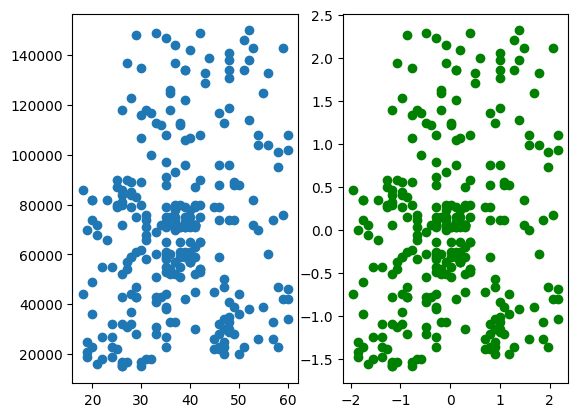

In [12]:
fig,(ax1 , ax2)= plt.subplots(ncols=2)
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

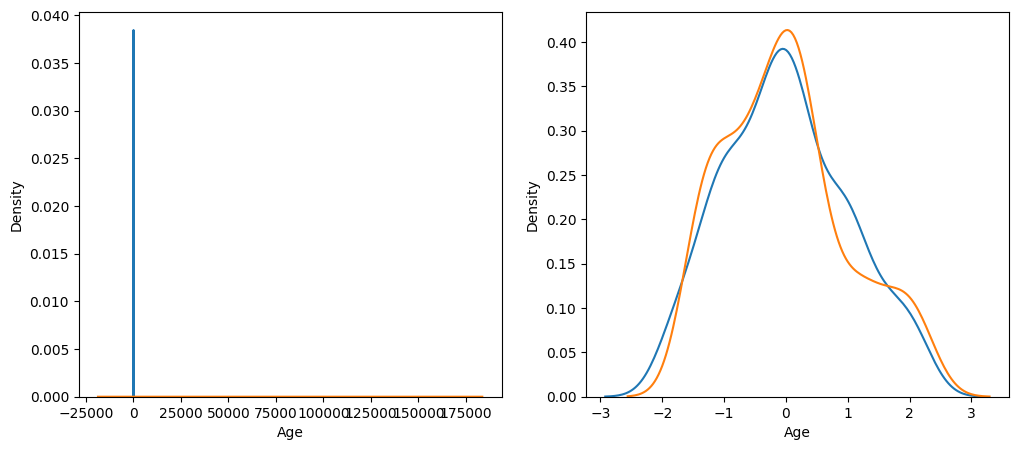

In [13]:

fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

upar jaise hum dekh pa rahe the ki data scaled nahi tha iske wajh se compare nahi kar pa rahe the , but ab scaling ke bad data conparable hai

<Axes: xlabel='Age', ylabel='Density'>

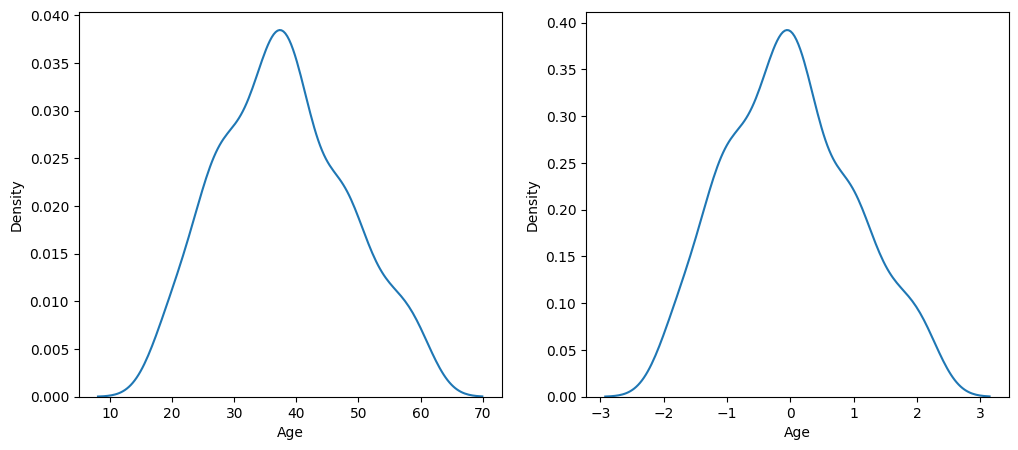

In [14]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['Age'],ax=ax1)


sns.kdeplot(x_train_scaled['Age'],ax=ax2)


logistic regression me data scaled hona bahoot important hai

but kai algorithm hai jaha scaling ka itna farq nahi padta jaise decison tree , random forest , gradient boost, XG boost

agar outlier wale column ko scale karte ho toh uska koi farq nahi padta , outlier ka effect rehta hi hai , agar hum scale kar bhi rahe hai toh , isliye humme explicitly outlier ko handle karna padega

when to use standartize ?

standartize ka loss nahi hota , isse accuracy kam kabhi nahi hoti

K means : use of Eculedian Distance measure

k- nearest neighbours : Measure the distance between pairs of samples and these distances are influenced by the measurement units

PCA try to get feature with maximum variance

ANN : apply gradient descent

Gradient descent : thetha calculation becomes faster after feature scaling and the learning rate in the update equation of stochastic gradient descent is same for every parameter

**Normalization**

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

eliminate units , just works with values of weights

**MinMax Scaling**

(Xi' = Xi - Xmin / Xmax - Xmin ) , range = [0,1] , unit rectangle me data ko dal rahe ho

, **Mean Normalization**

xi' = xi -x_mean / x_max - x_min , Range = [-1,1] , scikit me iske liye koi class nahi hai , yeh waha use kiya jata hai jin algorithm me humme centered data chaiye hota hai , isliye generally log standartization use kar lete hai

, **Max absolute Scaling**

xi' = xi / |x_max| , iske liye ek scikit me ek class MaxAbsScaler , yeh generally use kiya jata hai jha saprse data hota hai, matlab apke data me zeros bahoot hai

 **robust scaling**

xi' = xi - x_median / IQR{75th -25th per}
, iske liye class hai RobustScaler in sklearn preprocessing library  , most good advantage is it is Robust to outliers

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Data set for Data science/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['class label','Alchol','Malic acid']

In [16]:
df.head()

,class label,Alchol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alchol', ylabel='Malic acid'>

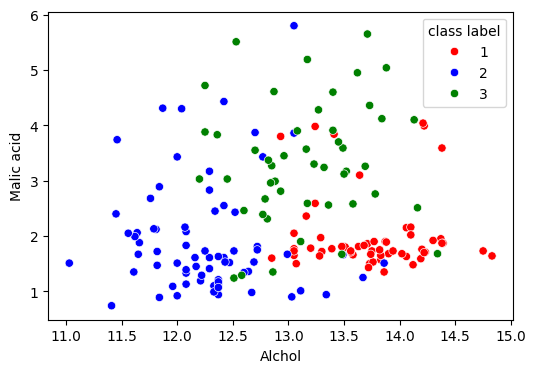

In [17]:
color_dict ={1:'red',3:'green',2:'blue'}
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Alchol'],y=df['Malic acid'],hue=df['class label'],palette=color_dict)

In [18]:
x= df.drop('class label', axis =1)#explicitly axis batani padti hai nahi toh error
y= df['class label']
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#here scaler learn about is parameter , to do this fit the scaler to the train set
scaler.fit(x_train)

MinMaxScaler()

In [21]:
#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
#leta hai datframe but return karta hai numpy
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [23]:
x_train_scaled.head()

,Alchol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [24]:
np.round(x_train_scaled.describe(),1)

,Alchol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


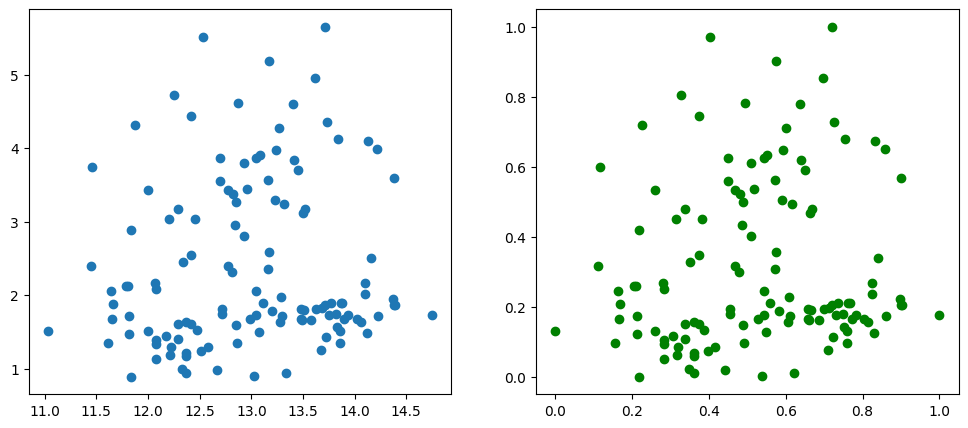

In [26]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize = (12,5))
ax1.scatter(x_train['Alchol'],x_train['Malic acid'])
ax2.scatter(x_train_scaled['Alchol'],x_train_scaled['Malic acid'],color='green')
plt.show()

<Axes: xlabel='Alchol', ylabel='Density'>

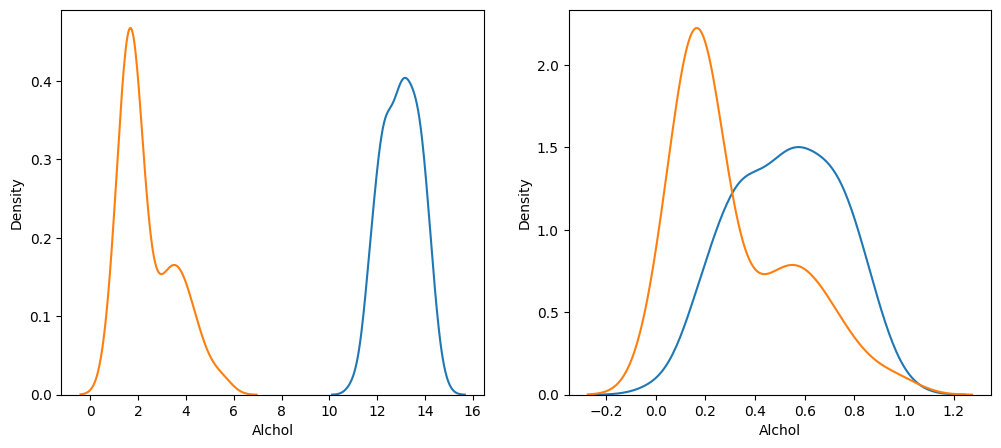

In [30]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['Alchol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

sns.kdeplot(x_train_scaled['Alchol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

minmax me kuch distribution ke liye scale change ho ssakta hai shape

**When to use Normalization or Standardization**



1.   pehle samjho kis algorithm ke sath aap kam kar rahe ho , kya sache me feature engineering ki zarrorat hai , kyuki jaise aap decision tree ke sath aap kam kar rahe ho ,kyuki decision tree me feature scaling karna use less hai

2.   most of the problem are solved using standartization , toh normaliszation kaha use karenge , jaise minmax hai woh waha use karn hai jaha humme minimum aur maximum pehle se pata hai , bakki upar explanation har type ke normalization ke liye

